# Bevezetés az adattudományba 1.

## 1. notebook (bevezetés, adatok kezelése, felderítő elemzés)

### IPython

* IPython command shell for interactive computing in multiple programming languages, originally developed for Python.
* Powerful interactive shells (terminal and Qt-based).
* A browser-based notebook with support for code, text, mathematical expressions, inline plots and other rich media.
* Support for interactive data visualization and use of GUI toolkits.
* Flexible, embeddable interpreters to load into one's own projects.

### Hasznos Python csomagok

#### SciPy - Python csomagok gyűjteménye, úgy mint:

* NumPy - N-dimenional arrays
* SciPy library - scientific computing
* Matplotlib - for plotting
* IPython - for sharing results
* Sympy - symbolic math
* pandas - data analysis

In [1]:
from IPython.core.display import Image, display
from IPython.core.display import HTML

In [2]:
HTML('<iframe src=http://www.scipy.org/ width=1000 height=350></iframe>')

C:\tools\Anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#### Scikit- learn - gépi tanulás Pythonban

In [3]:
HTML('<iframe src=http://scikit-learn.org/stable/ width=1000 height=400></iframe>')

### Adatok, obejktumok

#### Lehetséges adatobjektumok

* Saját módon definiált listák / dictionary-k használata
* NumPy tömb (array)
* a DataFrame object a Pandas csomagból
* ...

Scikit jól működik a NumPy tömböket használva

A különböző formátumok közötti átváltás nem mindig triviális!

#### Egyszerű listák

In [4]:
data1 = [1,2,3]

In [5]:
data1

[1, 2, 3]

## Numpy tömb (array)

* egy N-dimenziós array
* fast, flexible container for large data sets in Python

Numpy dokumentáció: https://docs.scipy.org/doc/numpy-dev/user/index.html

Numpy puskalap

In [6]:
HTML('<iframe src=https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf width=1000 height=400></iframe>')

In [7]:
import numpy as np

In [8]:
array1 = np.array(data1)

In [9]:
array1

array([1, 2, 3])

#### Többdimenziós tömb

In [10]:
array2 = np.array([[1,2,3],[2,3,4]])

In [11]:
array2

array([[1, 2, 3],
       [2, 3, 4]])

### Indexelés

In [12]:
array3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
array3

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [13]:
array3[2]

array([7, 8, 9])

In [14]:
array3[0][2]

3

A tömbökkel kapcsolatos részletes leírás megtalálható itt:

http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html

http://docs.scipy.org/doc/numpy/reference/arrays.html

### Adattípusok

* Különböző attribútumoknak eltérő típusa lehet
* Ezt kezelnünk kell Pythonban

In [15]:
array4 = np.array([[1,2,"left"],[4,5,"right"]])
array4

array([['1', '2', 'left'],
       ['4', '5', 'right']], dtype='<U11')

In [16]:
 array5 = np.array([1, 2, 3, 4, 5])
 array5.dtype

dtype('int32')

In [17]:
array5

array([1, 2, 3, 4, 5])

Az adattípust beállíthatjuk az N-dimenziósban tömbben globálisan.

In [18]:
 np.array([ 3, -1, -2, 0, 12, 10], dtype='int32')

array([ 3, -1, -2,  0, 12, 10])

In [19]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.unicode_)
numeric_strings

array(['1.25', '-9.6', '42'], dtype='<U4')

In [20]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

Hogyan lehet oszloponként külön-külön beállítani az adattípust?

### Strukturált tömbök

In [21]:
structured_array = np.array([(1, 2.0, 'Hello'), (2, 3.0, 'World')],dtype=[('f0', '>i4'), ('f1', '>f4'), ('f2', '|U10')])
structured_array

array([(1, 2., 'Hello'), (2, 3., 'World')],
      dtype=[('f0', '>i4'), ('f1', '>f4'), ('f2', '<U10')])

Kettő hosszúságú egydimenziós tömböt készítünk, az egyes elemek három adatot tartalmazó rekorodok:
32-bit integer, a 32-bit float, és 10 vagy kevesebb karakterből álló sztring

A numpy adattípusok áttekintése

http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html

### Adatok betöltése fáljból NumPy tömbbe

In [22]:
from io import StringIO   # StringIO behaves like a file object

In [23]:
d = StringIO('M 21 72\nF 35 58')
dat = np.loadtxt(d, dtype={'names': ('gender', 'age', 'weight'),
                     'formats': ('S1', 'i4', 'f4')})
dat

array([(b'M', 21, 72.), (b'F', 35, 58.)],
      dtype=[('gender', 'S1'), ('age', '<i4'), ('weight', '<f4')])

Az np.loadtxt byte módban működik, Python 2-ben ez az alapértelmezett sztringtípus. Azonban a Python 3 unicode-ot használ, és a byte-sztringeket b-vel jelöli meg.

Oszlopok kiválasztása

In [24]:
dat['gender']

array([b'M', b'F'], dtype='|S1')

In [25]:
dat[['gender','weight']]

array([(b'M', 72.), (b'F', 58.)],
      dtype={'names':['gender','weight'], 'formats':['S1','<f4'], 'offsets':[0,5], 'itemsize':9})

In [26]:
c = StringIO("1,0,2\n3,0,4")
x = np.loadtxt(c, delimiter=',', usecols=(0,2))
x

array([[1., 2.],
       [3., 4.]])

### Adatok beolvasása fájlból

In [27]:
import sys
f = open("../Adatok/bank.csv",'r')
bank_data = np.loadtxt(f, dtype={'names': ('age', 'sex', 'region', 'income', 'married', 'children', 'car','save_acct', 'current_acct', 'mortgage', 'pep'),
                                 'formats': ('i', 'S6', 'S10', 'f', 'S3', 'i2', 'S3', 'S3', 'S3', 'S3', 'S3')})
bank_data[0:10]

array([(48, b'FEMALE', b'INNER_CITY', 17546.  , b'NO', 1, b'NO', b'NO', b'NO', b'NO', b'YES'),
       (40, b'MALE', b'TOWN', 30085.1 , b'YES', 3, b'YES', b'NO', b'YES', b'YES', b'NO'),
       (51, b'FEMALE', b'INNER_CITY', 16575.4 , b'YES', 0, b'YES', b'YES', b'YES', b'NO', b'NO'),
       (23, b'FEMALE', b'TOWN', 20375.4 , b'YES', 3, b'NO', b'NO', b'YES', b'NO', b'NO'),
       (57, b'FEMALE', b'RURAL', 50576.3 , b'YES', 0, b'NO', b'YES', b'NO', b'NO', b'NO'),
       (57, b'FEMALE', b'TOWN', 37869.6 , b'YES', 2, b'NO', b'YES', b'YES', b'NO', b'YES'),
       (22, b'MALE', b'RURAL',  8877.07, b'NO', 0, b'NO', b'NO', b'YES', b'NO', b'YES'),
       (58, b'MALE', b'TOWN', 24946.6 , b'YES', 0, b'YES', b'YES', b'YES', b'NO', b'NO'),
       (37, b'FEMALE', b'SUBURBAN', 25304.3 , b'YES', 2, b'YES', b'NO', b'NO', b'NO', b'NO'),
       (54, b'MALE', b'TOWN', 24212.1 , b'YES', 2, b'YES', b'YES', b'YES', b'NO', b'NO')],
      dtype=[('age', '<i4'), ('sex', 'S6'), ('region', 'S10'), ('income', '<f4')

In [28]:
bank_data2 = np.loadtxt("../Adatok/bank.csv", dtype={'names': ('age', 'sex', 'region', 'income', 'married', 'children', 'car','save_acct', 'current_acct', 'mortgage', 'pep'),
                                 'formats': ('i', 'S6', 'S10', 'f', 'S3', 'i2', 'S3', 'S3', 'S3', 'S3', 'S3')})
bank_data2[0:10]

array([(48, b'FEMALE', b'INNER_CITY', 17546.  , b'NO', 1, b'NO', b'NO', b'NO', b'NO', b'YES'),
       (40, b'MALE', b'TOWN', 30085.1 , b'YES', 3, b'YES', b'NO', b'YES', b'YES', b'NO'),
       (51, b'FEMALE', b'INNER_CITY', 16575.4 , b'YES', 0, b'YES', b'YES', b'YES', b'NO', b'NO'),
       (23, b'FEMALE', b'TOWN', 20375.4 , b'YES', 3, b'NO', b'NO', b'YES', b'NO', b'NO'),
       (57, b'FEMALE', b'RURAL', 50576.3 , b'YES', 0, b'NO', b'YES', b'NO', b'NO', b'NO'),
       (57, b'FEMALE', b'TOWN', 37869.6 , b'YES', 2, b'NO', b'YES', b'YES', b'NO', b'YES'),
       (22, b'MALE', b'RURAL',  8877.07, b'NO', 0, b'NO', b'NO', b'YES', b'NO', b'YES'),
       (58, b'MALE', b'TOWN', 24946.6 , b'YES', 0, b'YES', b'YES', b'YES', b'NO', b'NO'),
       (37, b'FEMALE', b'SUBURBAN', 25304.3 , b'YES', 2, b'YES', b'NO', b'NO', b'NO', b'NO'),
       (54, b'MALE', b'TOWN', 24212.1 , b'YES', 2, b'YES', b'YES', b'YES', b'NO', b'NO')],
      dtype=[('age', '<i4'), ('sex', 'S6'), ('region', 'S10'), ('income', '<f4')

Beolvasásnál figyeljünk a fájl elérési útvonalára!

Vegyük figyelembe, hogy melyik mappában fut a notebook, és melyik mappában van a fájl.

Abszolút elérési útvonalak helyett érdemes relaítv útvonalat használni, ezekről [bővebben itt olvashattok](https://www.computerhope.com/issues/ch001708.htm).

Az elérési utak megadásánál az alábbi jelöléseket használhatjuk rövidítésként a mappáknál:

* . : az aktuális mappa

* .. : a szülő mappa

* / vagy \: a gyökérmappa

* ~ : UNIX esetén a felhasználó saját (HOME) mappája

A házi feladatban is majd ezt szem előtt tartva töltsétek be az adatokat!

#### A bank adathalmaz attríbutumai

* age: age of customer in years (numeric)
* sex: MALE / FEMALE
* region: inner_city/rural/suburban/town
* income: income of customer (numeric)
* married: is the customer married (YES/NO)
* children: number of children (numeric)
* car: does the customer own a car (YES/NO)
* save_acct: does the customer have a saving account (YES/NO)
* current_acct: does the customer have a current account (YES/NO)
* mortgage: does the customer have a mortgage (YES/NO)
* pep: did the customer buy a PEP (Personal Equity Plan) after the last mailing (YES/NO)

#### Egy kis vizualizáció

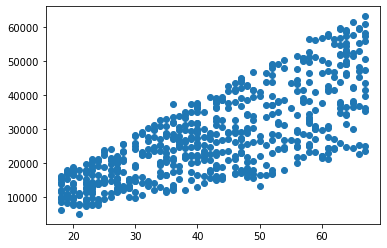

In [29]:
age = bank_data['age']
income = bank_data['income']

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

plt.scatter(age,income)

In [30]:
age

array([48, 40, 51, 23, 57, 57, 22, 58, 37, 54, 66, 52, 44, 66, 36, 38, 37,
       46, 62, 31, 61, 50, 54, 27, 22, 56, 45, 39, 39, 61, 61, 20, 45, 33,
       43, 27, 19, 36, 43, 66, 55, 47, 67, 32, 20, 64, 50, 29, 52, 47, 24,
       36, 43, 48, 63, 52, 58, 28, 29, 34, 42, 65, 47, 20, 21, 42, 19, 41,
       30, 31, 25, 21, 36, 58, 64, 59, 45, 61, 30, 58, 50, 30, 29, 35, 62,
       36, 25, 66, 30, 54, 37, 28, 53, 61, 61, 18, 22, 34, 35, 18, 54, 27,
       42, 43, 64, 43, 49, 23, 23, 30, 36, 34, 51, 36, 56, 54, 56, 26, 39,
       64, 46, 62, 36, 35, 47, 47, 37, 48, 41, 27, 43, 61, 52, 64, 66, 53,
       20, 57, 65, 64, 52, 47, 28, 64, 25, 58, 34, 20, 63, 30, 53, 43, 63,
       33, 41, 20, 50, 24, 60, 44, 23, 40, 49, 21, 40, 26, 20, 24, 37, 56,
       52, 22, 35, 34, 67, 58, 40, 41, 43, 63, 22, 60, 65, 48, 38, 49, 20,
       48, 38, 41, 67, 39, 64, 41, 55, 52, 30, 52, 26, 26, 46, 46, 52, 37,
       22, 18, 63, 25, 67, 27, 61, 58, 22, 28, 23, 27, 27, 40, 39, 35, 37,
       47, 42, 67, 57, 47

Matplotlib dokumentáció:
    
https://matplotlib.org/

### Pandas

Ismerkedjünk meg a Pandas adattáblákkal

Pandas puskalap

In [2]:
HTML('<iframe src=a width=1000 height=400></iframe>')

NameError: name 'HTML' is not defined

In [32]:
import pandas as pd

#### A MoviLens adat

###### Felhasználói adatok

In [35]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols)

users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [36]:
users.columns

Index(['user_id', 'age', 'sex', 'occupation', 'zip_code'], dtype='object')

In [37]:
users.shape

(943, 5)

##### Értékelések

In [38]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols)

ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


##### Filmek adatai

In [39]:
# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 
            'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
    sep='|', names=m_cols, usecols=range(5), encoding='latin-1')

movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


##### Néhány alapvető információ az adatról

In [40]:
print(movies.dtypes)
print(movies.describe())

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object
          movie_id  video_release_date
count  1682.000000                 0.0
mean    841.500000                 NaN
std     485.695893                 NaN
min       1.000000                 NaN
25%     421.250000                 NaN
50%     841.500000                 NaN
75%    1261.750000                 NaN
max    1682.000000                 NaN


##### Adatok kiválsztása, szűrése, ábrázolása

* DataFrame => Series csoportosítva közös index alapján
* egyedüli DataFrame oszlop => Series

In [41]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [42]:
users['occupation'].head()
## *** Where did the nice design go? ***

0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object

In [43]:
columns_you_want = ['occupation', 'sex']
print(columns_you_want)
users[columns_you_want].head()

['occupation', 'sex']


,occupation,sex
0,technician,M
1,other,F
2,writer,M
3,technician,M
4,other,F


Felhasználók korának hisztogramja

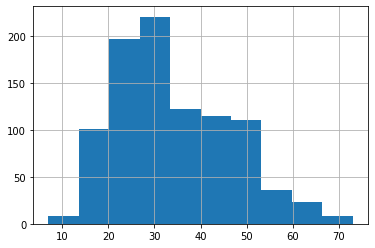

In [44]:
users.age.hist()

25 évnél idősebb felhasználók

In [45]:
oldUsers = users[users.age > 25]
oldUsers.head()

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


40 éves férfiak

In [46]:
# users aged 40 AND male
users[(users.age == 40) & (users.sex == 'M')].head(6)

,user_id,age,sex,occupation,zip_code
18,19,40,M,librarian,02138
82,83,40,M,other,44133
115,116,40,M,healthcare,97232
199,200,40,M,programmer,93402
283,284,40,M,executive,92629
289,290,40,M,engineer,93550


Női programozók átlagéletkora

In [47]:
## users who are female and programmers
selected_users = users[(users.sex == 'F') & 
                       (users.occupation == 'programmer')]

## show statistic summary
print(selected_users.describe())

## alternatives:
print(selected_users.age.mean())
print(selected_users['age'].mean())

          user_id        age
count    6.000000   6.000000
mean   411.166667  32.166667
std    149.987222   5.115336
min    292.000000  26.000000
25%    313.000000  28.250000
50%    378.000000  32.000000
75%    416.750000  36.500000
max    698.000000  38.000000
32.166666666666664
32.166666666666664


##### Split-apply-combine

* felosztani az adatot csoportokra valamilyen kritérium alapján (split)
* hattatni egy függvényt az egyes csoportokra függetlenül (apply)
* összekombinálni az eredményeket egy adatstruktúrába (combine)

##### Egyes felhasználók átlagos értékelései

In [48]:
user_mean = ratings.groupby(['user_id'])['rating'].mean()
user_mean.head()

user_id
1    3.610294
2    3.709677
3    2.796296
4    4.333333
5    2.874286
Name: rating, dtype: float64

##### Másként: hattatva egy függvényt

In [49]:
grouped_data = ratings.groupby(['user_id'])['rating']
average_ratings = grouped_data.apply(lambda f: f.mean())
average_ratings.head()

user_id
1    3.610294
2    3.709677
3    2.796296
4    4.333333
5    2.874286
Name: rating, dtype: float64

###### Egyes felhasználók értékeléseinek száma

In [50]:
user_count = ratings.groupby(['user_id'])['rating'].count()
user_count.head()

user_id
1    272
2     62
3     54
4     24
5    175
Name: rating, dtype: int64

##### Legszorgalmasabb felhasználók

In [51]:
user_count.sort_values(ascending = False)[0:9]

user_id
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
Name: rating, dtype: int64

##### Férfiak által dominált szakmák

In [52]:
grouped_data = users.groupby(users['occupation'])['sex']
male_dominant_occupations = grouped_data.apply(lambda f: 
                                               sum(f == 'M') > sum(f == 'F'))
male_dominant_occupations

occupation
administrator     True
artist            True
doctor            True
educator          True
engineer          True
entertainment     True
executive         True
healthcare       False
homemaker        False
lawyer            True
librarian        False
marketing         True
none              True
other             True
programmer        True
retired           True
salesman          True
scientist         True
student           True
technician        True
writer            True
Name: sex, dtype: bool

### Adatkinyerés a webről (web scraping)

Legyünk óvatosak és tisztességesek (copyright, engedélyek, médiatörvény, oldalak túlterhelése stb.)!

**Robots.txt**

* a website tulajdonosa határozza meg

* utasításokat ad a "webes robotoknak"  (azaz szkriptejinkek)

* a webszerver gyökérkönyvtárában található

Nem muszáj ilyet írni!

Kockázatos is lehet a használata (lényegében elmondjuk annak, aki megnézi, hogy hol tároljuk a szenzitív infromációt!)

**Rossz hír:** A weboldalakról való adatkinyeréshez érteni kell valamennyire a HTML tagekhez!

**Több hasznos library Pythonban:**
* urllib
* beautifulsoup

**A teljes weblap beolvasása sztringként Urllibbal**

In [53]:
HTML('<iframe src=https://www.crummy.com/software/BeautifulSoup/ width=1000 height=400></iframe>')

C:\tools\Anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [54]:
from urllib.request import urlopen
url = 'http://www.crummy.com/software/BeautifulSoup'
source = urlopen(url).read().decode('utf-8')
print(source)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link rev="made" href="mailto:leonardr@segfault.org">
<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">
<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">
<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">
<meta name="author" content="Leonard Richardson">
</head>
<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">
<style>
#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
</style>		   

<img align="right" src="10.1.jpg" width="250"><br />

<p>[

In [55]:
## count occurences of 'Soup'
print(source.count('Soup'))

50


In [56]:
## find index of 'Reddit uses Beautiful Soup'
position =  source.find('Reddit uses Beautiful Soup')
print(position)

7652


In [57]:
# test to see the substring
print(source[position:position + len('Reddit uses Beautiful Soup')])

Reddit uses Beautiful Soup


#### Beautiful Soup használata

In [58]:
import bs4 #this is beautiful soup

In [59]:
soup = bs4.BeautifulSoup(source, "lxml")

In [60]:
print(soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link href="mailto:leonardr@segfault.org" rev="made"/>
<link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
<meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
<meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
<meta content="Leonard Richardson" name="author"/>
</head>
<body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
<style>
#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
</style>
<img align="right" src="10.1.jpg" width="250"/><br/>
<p>[ 

In [61]:
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
  <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
  <meta content="Leonard Richardson" name="author"/>
 </head>
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
  <style>
   #tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
  </style>
  <img align="right" src="1

In [62]:
# show how to find all a tags
soup.findAll('a')

[<a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="enterprise.html">For enterprise</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG">Changelog</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="zine/">Zine</a>,
 <a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="http://lxml.de/">lxml</a>,
 <a href="http://code.google.com/p/html5lib/">html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a href="https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&amp;utm_medium=referral&amp;utm_campaign=enterprise" target="_blank">
 <span class="cta">
   Beautiful Soup for enterprise available via Tidelift
  </span>
 </a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">the discussion
 gr

In [63]:
# get all links in the page
link_list = [l.get('href') for l in soup.findAll('a')]
link_list

['#Download',
 'bs4/doc/',
 '#HallOfFame',
 'enterprise.html',
 'https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'zine/',
 'bs4/download/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'bs4/doc/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'zine/',
 None,
 'bs4/download/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'download/3.x/BeautifulSoup-3.2.2.tar.gz',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_sourc

In [64]:
# filter all external links
# create an empty list to collect the valid links
external_links = []

# write a loop to filter the links
# if it is not None and starts with 'http' we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
        
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/BlankerL/DXY-COVID-19-Crawler',
 'ht

In [65]:
# and we can put this in a list comprehension as well, it almost reads like 
# a sentence.

[l for l in link_list if l is not None and l.startswith('http')]

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/BlankerL/DXY-COVID-19-Crawler',
 'ht